# image reading

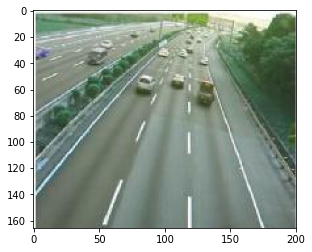

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lanewithout.png')

plt.imshow(img)

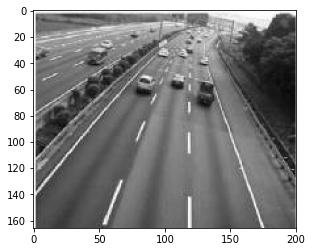

In [16]:
img4= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img4, cmap = plt.get_cmap('gray'))

# edge detection

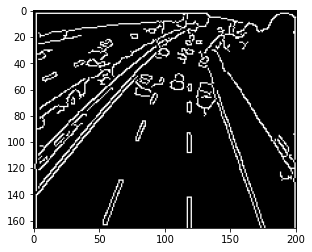

In [17]:
#canny edge detection

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
canny = cv2.Canny(blur,50,150)
plt.imshow(canny,cmap='gray')

# Selecting region of interest

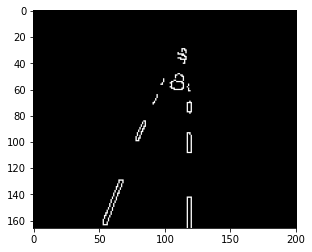

In [18]:
def region_of_interest(image):
    height = image.shape[0]
    polygons= np.array([
                            [(44, height), (129, height), (115, 20)]
                        ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    segment = cv2.bitwise_and(image, mask)
    return segment
plt.imshow(region_of_interest(canny),cmap='gray')

# using hough transform 

In [19]:
lines = cv2.HoughLinesP(region_of_interest(canny), 2, np.pi / 180, 25, np.array([]), minLineLength = 40, maxLineGap = 40)
print(lines)

[[[113  29 120 165]]

 [[ 55 163  85  84]]

 [[118 142 119  69]]

 [[114  29 118  93]]

 [[ 53 163  83  85]]

 [[ 56 161  99  53]]

 [[116  30 120 108]]]


In [20]:
#function to display lines detected by hough transform

def display_lines(image,lines):
    line_image = np.zeros_like(image)
    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),4)
    return line_image

[[[113  29 120 165]]

 [[ 55 163  85  84]]

 [[118 142 119  69]]

 [[114  29 118  93]]

 [[ 53 163  83  85]]

 [[ 56 161  99  53]]

 [[116  30 120 108]]]


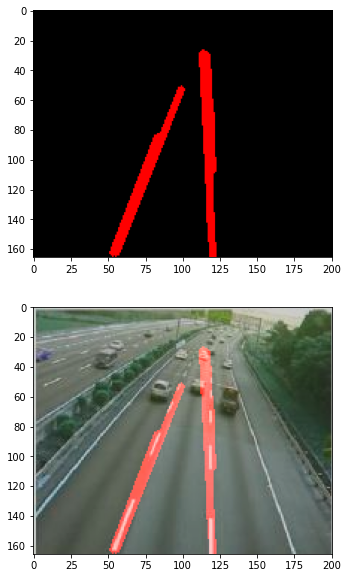

In [21]:
laneimg = np.copy(img)
gray = cv2.cvtColor(laneimg, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
canny = cv2.Canny(blur,50,150)

cropped_img = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_img, 2, np.pi / 180, 25, np.array([]), minLineLength = 40, maxLineGap = 40)
print(lines)
line_image = display_lines(laneimg,lines)
overlay_img = cv2.addWeighted(laneimg,0.8,line_image,1,1)

plt.figure(2,figsize=(10,10))
plt.subplot(211)
plt.imshow(line_image,cmap='gray')

plt.subplot(212)
plt.imshow(overlay_img)
plt.show()